In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.patches import Circle
import matplotlib.cm as cm

In [2]:
R = 2.0
U = 2.0
x = np.linspace(-4, 4, 25)
y = np.linspace(-4, 4, 25)

In [3]:
xx, yy = np.meshgrid(x, y)

rr = np.sqrt(xx ** 2 + yy ** 2)
tt = np.arctan2(yy, xx)

# Enmascaramos el centro para evitar singularidades
rr = np.ma.masked_less_equal(rr, R * 0.9)

In [4]:
# Función potencial
phi = U * (rr + R ** 2 / rr) * np.cos(tt)

# Función de corriente
psi = U * (rr - R ** 2 / rr) * np.sin(tt)

# Coeficiente de presiones
c_p = 2 * R ** 2 / rr ** 2 * np.cos(2 * tt) - R ** 4 / rr ** 4

# Velocidad (polares)
v_r = U * (1 - R ** 2 / rr ** 2) * np.cos(tt)
v_theta = -U * (1 + R ** 2 / rr ** 2) * np.sin(tt)

# Velocidad (rectangulares)
v_x = v_r * np.cos(tt) - v_theta * np.sin(tt)
v_y = v_r * np.sin(tt) + v_theta * np.cos(tt)
# Creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111)

# Cilindro
c = Circle((0, 0), R, color='#bbbbbb', linewidth=0, zorder=10)
ax.add_patch(c)

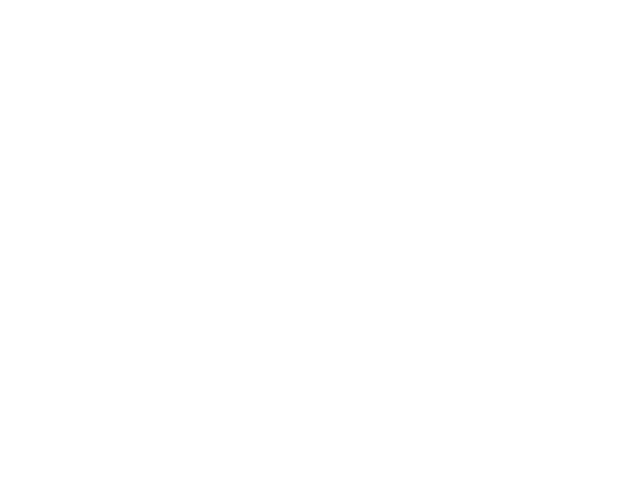

In [9]:
# Líneas de corriente
#ax.streamplot(xx, yy, v_x, v_y, linewidth=0.8, color='k')
ax.quiver(xx,yy,v_x,v_y)

# Etiquetas
ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_title("Flujo potencial")
ax.set_aspect(0.5)
plt.show()